
# **<font color = 'geen'> Lab Report-04 </font>**

- Name `Pankaj Mahanta`
- ID `213902002`
- Section `213D4`

# **Lab Experiment: Data Processing and Visualization Techniques in Data Mining**

## **Objectives/Aim**
The primary objective of this lab is to explore and apply various data processing and visualization techniques to analyze datasets effectively. The key goals include:
- Handling NULL and missing values.
- Identifying and removing garbage values.
- Visualizing the effects of missing values, outliers, and data distribution.
- Using different data visualization techniques to extract insights.
- Evaluating the impact of data preprocessing on model performance.

---

## **Procedure / Analysis / Design**
1. **Dataset Selection**  
   - Choose a dataset containing NULL and garbage values from Kaggle or any other source.  
   - If necessary, manually introduce inconsistencies for demonstration purposes.  

2. **Data Cleaning Steps**  
   - Identify and handle missing values using different strategies (drop, mean/mode/median imputation, forward fill, etc.).  
   - Detect and replace garbage values in categorical and numerical columns.  

3. **Data Visualization Techniques**  
   - **Missing Values Visualization:** Heatmaps, bar charts.  
   - **Data Distribution:** Histograms, box plots, KDE plots.  
   - **Outlier Detection:** Box plots, scatter plots.  
   - **Correlation Analysis:** Heatmaps, pair plots.  
   - **Categorical Data Representation:** Bar plots, count plots.  

4. **Effect of Data Visualization on Understanding Data**  
   - Compare dataset characteristics before and after preprocessing using different visualization techniques.

## **Implementation**
- Load the dataset and explore its structure.
- Apply all data cleaning techniques.
- Implement various visualization methods to analyze and interpret data.

## **<font color = 'geen'> Import Library </font>**

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **<font color = 'geen'> Loading Dataset </font>**

In [5]:
data = pd.read_csv('melb_data.csv')
data.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## **<font color = 'geen'> Data information </font>**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18396 non-null  int64  
 1   Suburb         18396 non-null  object 
 2   Address        18396 non-null  object 
 3   Rooms          18396 non-null  int64  
 4   Type           18396 non-null  object 
 5   Price          18396 non-null  float64
 6   Method         18396 non-null  object 
 7   SellerG        18396 non-null  object 
 8   Date           18396 non-null  object 
 9   Distance       18395 non-null  float64
 10  Postcode       18395 non-null  float64
 11  Bedroom2       14927 non-null  float64
 12  Bathroom       14925 non-null  float64
 13  Car            14820 non-null  float64
 14  Landsize       13603 non-null  float64
 15  BuildingArea   7762 non-null   float64
 16  YearBuilt      8958 non-null   float64
 17  CouncilArea    12233 non-null  object 
 18  Lattit

In [7]:
data = data.drop('Unnamed: 0',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         18396 non-null  object 
 1   Address        18396 non-null  object 
 2   Rooms          18396 non-null  int64  
 3   Type           18396 non-null  object 
 4   Price          18396 non-null  float64
 5   Method         18396 non-null  object 
 6   SellerG        18396 non-null  object 
 7   Date           18396 non-null  object 
 8   Distance       18395 non-null  float64
 9   Postcode       18395 non-null  float64
 10  Bedroom2       14927 non-null  float64
 11  Bathroom       14925 non-null  float64
 12  Car            14820 non-null  float64
 13  Landsize       13603 non-null  float64
 14  BuildingArea   7762 non-null   float64
 15  YearBuilt      8958 non-null   float64
 16  CouncilArea    12233 non-null  object 
 17  Lattitude      15064 non-null  float64
 18  Longti

In [8]:
print(data.columns)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [9]:
col_str = ['Suburb','Address','Type','Method','SellerG','Date','CouncilArea','Regionname']

data[col_str].head(5)

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
0,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,Yarra,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra,Northern Metropolitan
2,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra,Northern Metropolitan
3,Abbotsford,40 Federation La,h,PI,Biggin,4/03/2017,Yarra,Northern Metropolitan
4,Abbotsford,55a Park St,h,VB,Nelson,4/06/2016,Yarra,Northern Metropolitan


In [10]:
df = data.drop(col_str,axis=1)
df.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.7969,144.9969,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          18396 non-null  int64  
 1   Price          18396 non-null  float64
 2   Distance       18395 non-null  float64
 3   Postcode       18395 non-null  float64
 4   Bedroom2       14927 non-null  float64
 5   Bathroom       14925 non-null  float64
 6   Car            14820 non-null  float64
 7   Landsize       13603 non-null  float64
 8   BuildingArea   7762 non-null   float64
 9   YearBuilt      8958 non-null   float64
 10  Lattitude      15064 non-null  float64
 11  Longtitude     15064 non-null  float64
 12  Propertycount  18395 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.8 MB


## **<font color = 'geen'> Check Missing value </font>**

In [12]:
df.isnull().sum()

Rooms                0
Price                0
Distance             1
Postcode             1
Bedroom2          3469
Bathroom          3471
Car               3576
Landsize          4793
BuildingArea     10634
YearBuilt         9438
Lattitude         3332
Longtitude        3332
Propertycount        1
dtype: int64

In [13]:
cols = ['Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','Lattitude','Longtitude','Propertycount']

## **<font color = 'geen'> Missing Value handle </font>**

In [14]:
df[cols].head()

,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0
1,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
2,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0
3,3.0,2.0,1.0,94.0,NaN,NaN,-37.7969,144.9969,4019.0
4,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0


In [15]:
from sklearn.impute import SimpleImputer

In [16]:

sim_mean = SimpleImputer(missing_values=np.nan,strategy='mean')

In [17]:
sim_mean_df = sim_mean.fit_transform(df[cols])


In [18]:
sim_mean_df = pd.DataFrame(data=sim_mean_df,columns=cols)
sim_mean_df.head()

,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2.0,1.0,1.0,202.0,151.220219,1965.879996,-37.7996,144.9984,4019.0
1,2.0,1.0,0.0,156.0,79.000000,1900.000000,-37.8079,144.9934,4019.0
2,3.0,2.0,0.0,134.0,150.000000,1900.000000,-37.8093,144.9944,4019.0
3,3.0,2.0,1.0,94.0,151.220219,1965.879996,-37.7969,144.9969,4019.0
4,3.0,1.0,2.0,120.0,142.000000,2014.000000,-37.8072,144.9941,4019.0


## **<font color = 'geen'> Data Scaling </font>**

In [19]:
from sklearn.preprocessing import StandardScaler
sds = StandardScaler()

In [20]:
sds_df = sds.fit_transform(sim_mean_df)
sds_df

array([[-1.05078927, -0.8673281 , -0.71742168, ...,  0.13956898,
         0.02142416, -0.77959909],
       [-1.05078927, -0.8673281 , -1.88297632, ...,  0.02654184,
        -0.03051986, -0.77959909],
       [ 0.10007517,  0.74333159, -1.88297632, ...,  0.00747702,
        -0.02013105, -0.77959909],
       ...,
       [ 1.25093961,  2.35399128,  0.44813295, ...,  1.22272303,
         1.13375344, -1.37003984],
       [ 1.25093961, -0.8673281 , -0.71742168, ..., -0.02765672,
        -1.16196453, -0.21723212],
       [ 1.25093961,  0.74333159,  0.44813295, ..., -0.11494635,
        -1.27052754, -0.21723212]])

In [21]:
sds_df=pd.DataFrame(data=sds_df,columns=sim_mean_df.columns)

In [22]:
sds_df.head()

,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,-1.050789,-0.867328,-0.717422,-0.103865,0.000000,8.803660e-15,0.139569,0.021424,-0.779599
1,-1.050789,-0.867328,-1.882976,-0.117282,-0.214159,-2.550801e+00,0.026542,-0.030520,-0.779599
2,0.100075,0.743332,-1.882976,-0.123698,-0.003618,-2.550801e+00,0.007477,-0.020131,-0.779599
3,0.100075,0.743332,-0.717422,-0.135365,0.000000,8.803660e-15,0.176337,0.005841,-0.779599
4,0.100075,-0.867328,0.448133,-0.127782,-0.027341,1.863154e+00,0.036074,-0.023248,-0.779599


## **<font color = 'geen'> Data Splitting </font>**

In [23]:
x = sds_df.drop('Propertycount',axis=1)
x.head()

,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
0,-1.050789,-0.867328,-0.717422,-0.103865,0.000000,8.803660e-15,0.139569,0.021424
1,-1.050789,-0.867328,-1.882976,-0.117282,-0.214159,-2.550801e+00,0.026542,-0.030520
2,0.100075,0.743332,-1.882976,-0.123698,-0.003618,-2.550801e+00,0.007477,-0.020131
3,0.100075,0.743332,-0.717422,-0.135365,0.000000,8.803660e-15,0.176337,0.005841
4,0.100075,-0.867328,0.448133,-0.127782,-0.027341,1.863154e+00,0.036074,-0.023248


In [24]:
y = sds_df['Propertycount']
y.head()

0   -0.779599
1   -0.779599
2   -0.779599
3   -0.779599
4   -0.779599
Name: Propertycount, dtype: float64

In [25]:
df = sim_mean_df
df.head()

,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2.0,1.0,1.0,202.0,151.220219,1965.879996,-37.7996,144.9984,4019.0
1,2.0,1.0,0.0,156.0,79.000000,1900.000000,-37.8079,144.9934,4019.0
2,3.0,2.0,0.0,134.0,150.000000,1900.000000,-37.8093,144.9944,4019.0
3,3.0,2.0,1.0,94.0,151.220219,1965.879996,-37.7969,144.9969,4019.0
4,3.0,1.0,2.0,120.0,142.000000,2014.000000,-37.8072,144.9941,4019.0


## **<font color = 'geen'> Distributive Graph </font>**

C:\Users\Pankaj\AppData\Local\Temp\ipykernel_12580\827660091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Car'],bins=10,kde=True, rug=False)


<Axes: xlabel='Car', ylabel='Density'>

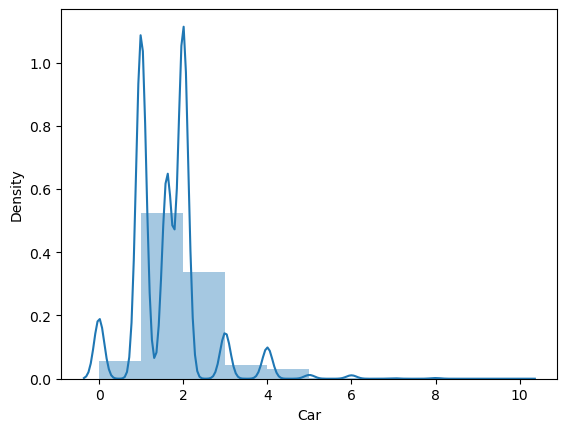

In [26]:
sns.distplot(df['Car'],bins=10,kde=True, rug=False)

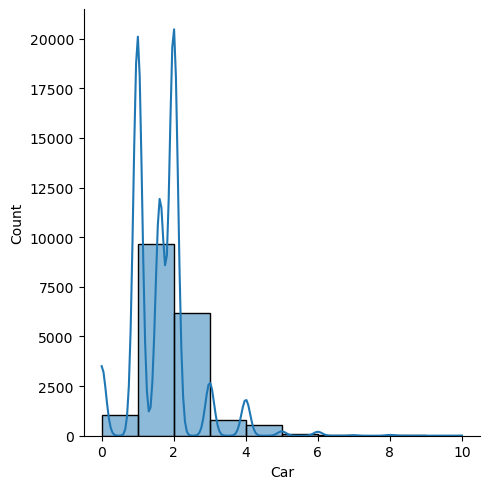

In [27]:
sns.displot(df['Car'],bins=10,kde=True,rug=False)

## **<font color = 'geen'> Box plot </font>**

In [28]:
df.columns

Index(['Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'Lattitude', 'Longtitude', 'Propertycount'],
      dtype='object')

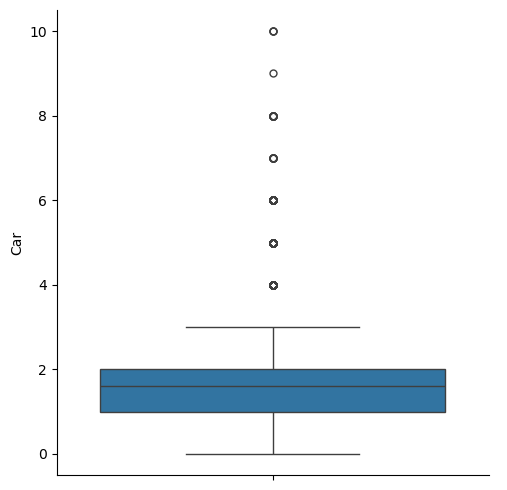

In [29]:
sns.catplot(x=df['Propertycount'][10:10],y='Car',kind='box',data=df)

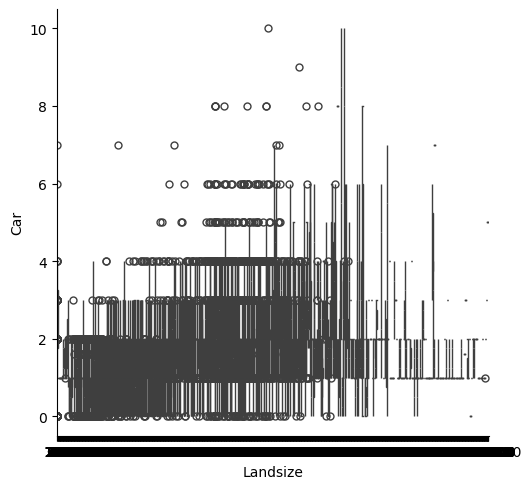

In [30]:
sns.catplot(x=df['Landsize'],y='Car',kind='box',data=df)

## **<font color = 'geen'> Pair Plot</font>**

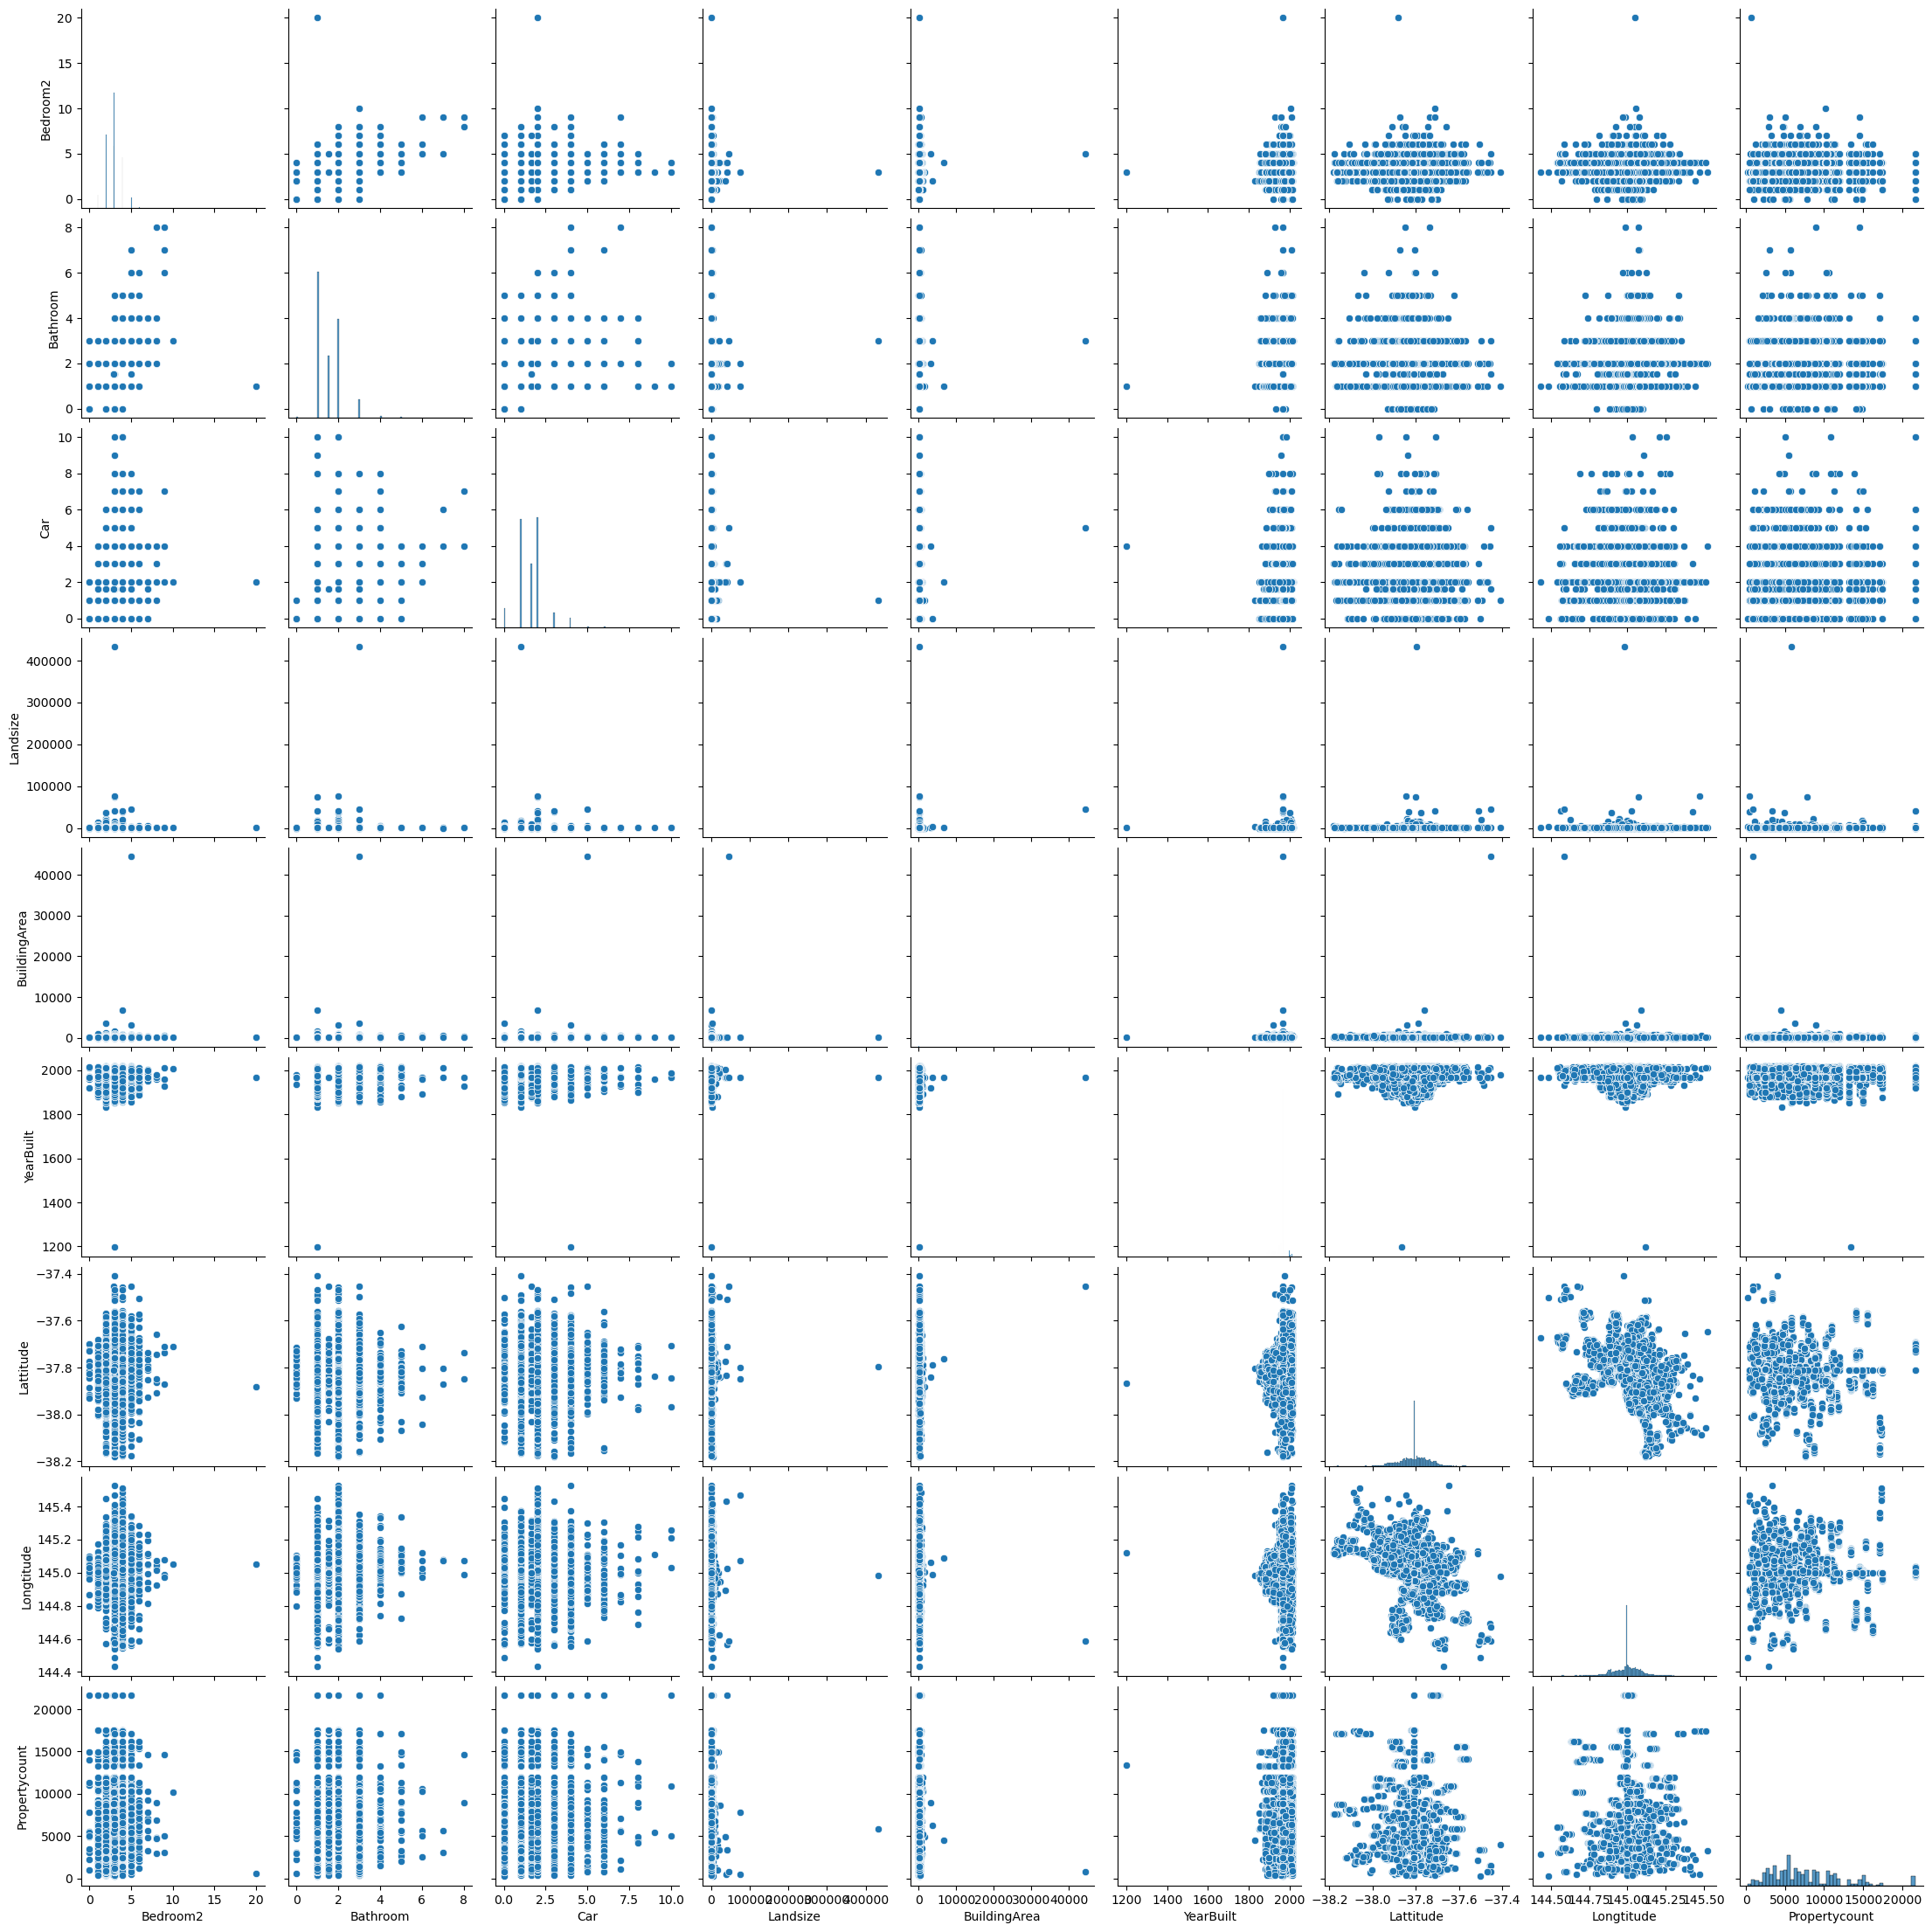

In [31]:
sns.pairplot(data=df)

## **<font color = 'geen'> Violin Plot </font>**

C:\Users\Pankaj\AppData\Local\Temp\ipykernel_12580\3762193774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x ='Car',y='Propertycount',data=df,width=0.8,palette='Set2')


<function matplotlib.pyplot.show(close=None, block=None)>

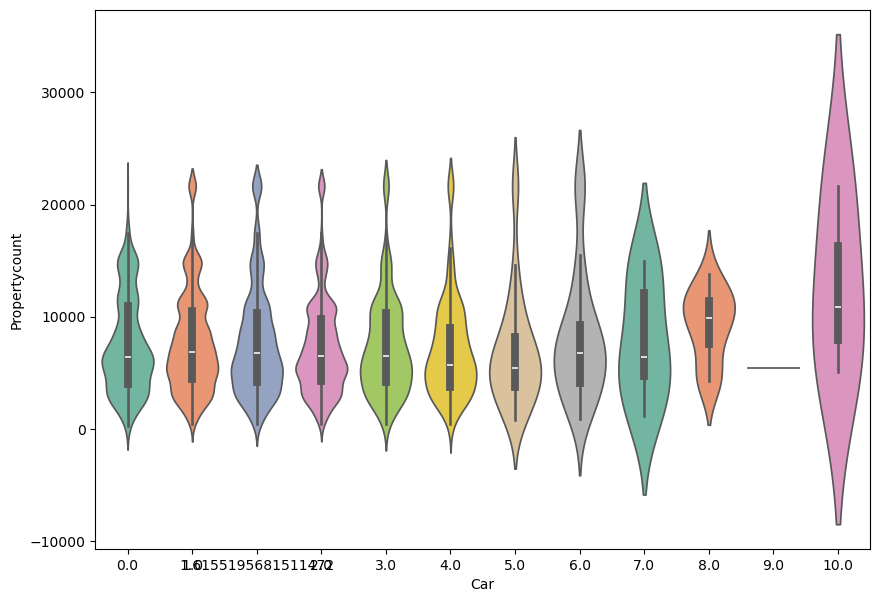

In [69]:
plt.figure(figsize=(10,7))
sns.violinplot(x ='Car',y='Propertycount',data=df,width=0.8,palette='Set2')
plt.show

## **<font color = 'geen'> Bivariate Analysis</font>**

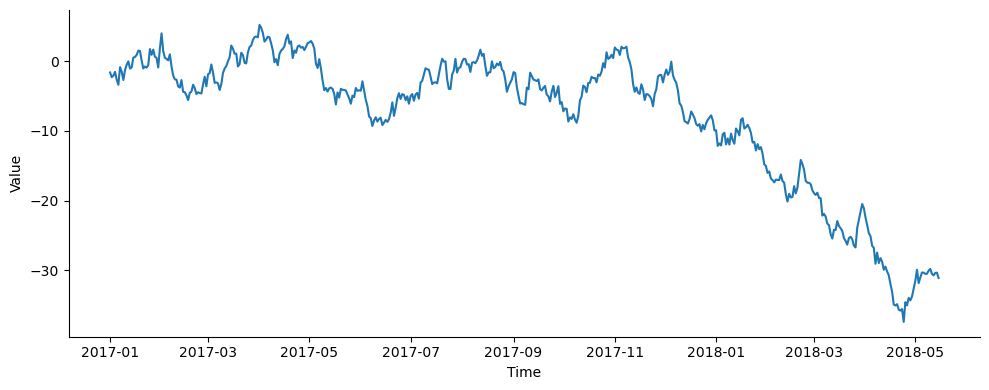

In [33]:
test_df = pd.DataFrame(dict(
    Time=pd.date_range("2017-1-1", periods=500),         
   
    Value=np.random.randn(500).cumsum()                   
    ))                                                  

sns.relplot(x="Time", y="Value", kind="line", data=test_df, height=4, aspect=15/6)


## **<font color = 'geen'> Bar Plot </font>**

C:\Users\Pankaj\AppData\Local\Temp\ipykernel_12580\3581882451.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=df['Bedroom2'],y=y,kind ='bar',data=df,palette='Set1')


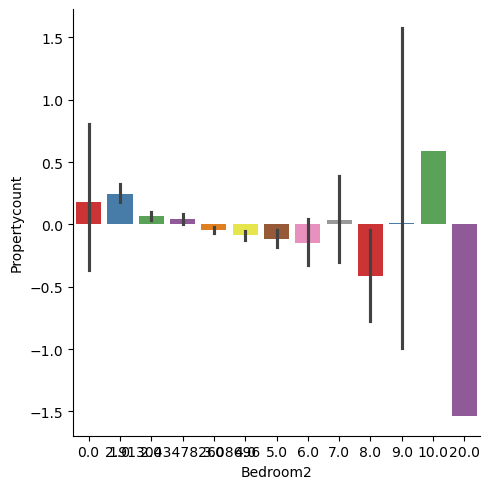

In [34]:
sns.catplot(x=df['Bedroom2'],y=y,kind ='bar',data=df,palette='Set1')

## **<font color = 'geen'> scatter plot </font>**

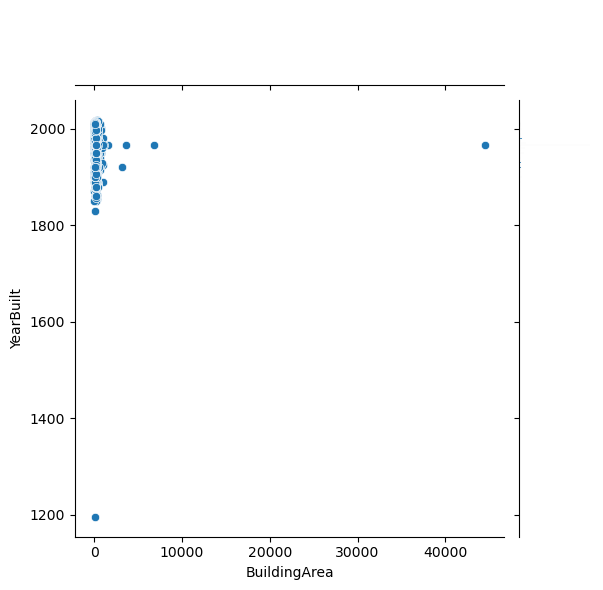

In [35]:
sns.jointplot(x=df['BuildingArea'],y=df['YearBuilt'],data=df,palette='Set3')

## **<font color = 'geen'>Multivariate Analysis</font>**

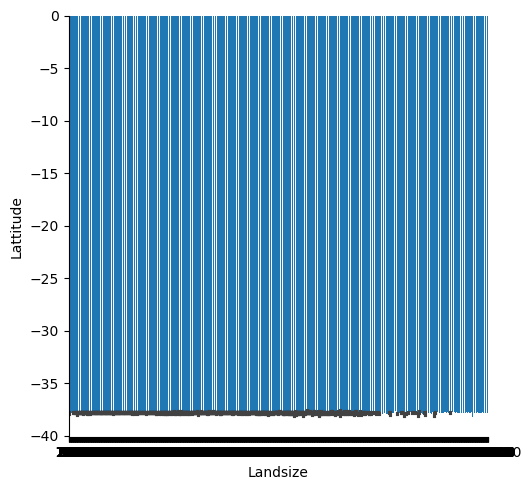

In [36]:
sns.catplot(x=df['Landsize'],y=df['Lattitude'],hue=df['Longtitude'][10:10],kind='bar',data=df)

## **<font color = 'geen'> Pearson Correlation's </font>**

In [37]:
print(df['Propertycount'].corr(df['Car']))
print(df['Propertycount'].corr(df['Car'],method='spearman'))

-0.020552389128136707
-0.03793901185487272


In [40]:
df.columns

Index(['Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'Lattitude', 'Longtitude', 'Propertycount'],
      dtype='object')

In [53]:
df.iloc[0:1,5:6]

,YearBuilt
0,1965.879996


In [57]:
df.iloc[5:6]

,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
5,2.0,1.0,0.0,181.0,151.220219,1965.879996,-37.8041,144.9953,4019.0


In [58]:
df2 = df.iloc[:,0:5]
df3 = df.iloc[:,5:]

In [59]:
df2.head()

,Bedroom2,Bathroom,Car,Landsize,BuildingArea
0,2.0,1.0,1.0,202.0,151.220219
1,2.0,1.0,0.0,156.0,79.000000
2,3.0,2.0,0.0,134.0,150.000000
3,3.0,2.0,1.0,94.0,151.220219
4,3.0,1.0,2.0,120.0,142.000000


In [60]:
df3.head()

,YearBuilt,Lattitude,Longtitude,Propertycount
0,1965.879996,-37.7996,144.9984,4019.0
1,1900.000000,-37.8079,144.9934,4019.0
2,1900.000000,-37.8093,144.9944,4019.0
3,1965.879996,-37.7969,144.9969,4019.0
4,2014.000000,-37.8072,144.9941,4019.0


In [72]:
df_combined = pd.concat([df2,df3],axis=1)

In [73]:
corr_df = df_combined.corr(method='pearson')

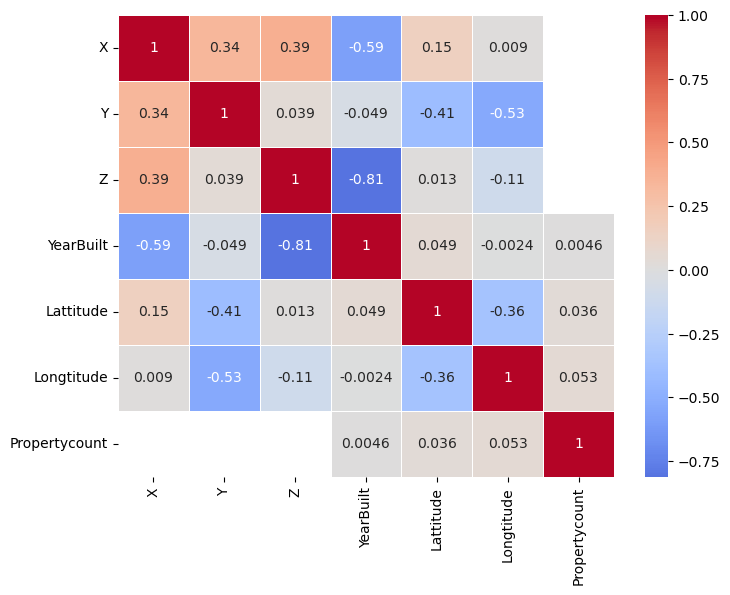

In [74]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_df,annot=True,cmap='coolwarm',center=0,linewidths=0.5)
plt.show()

## Random pearson check

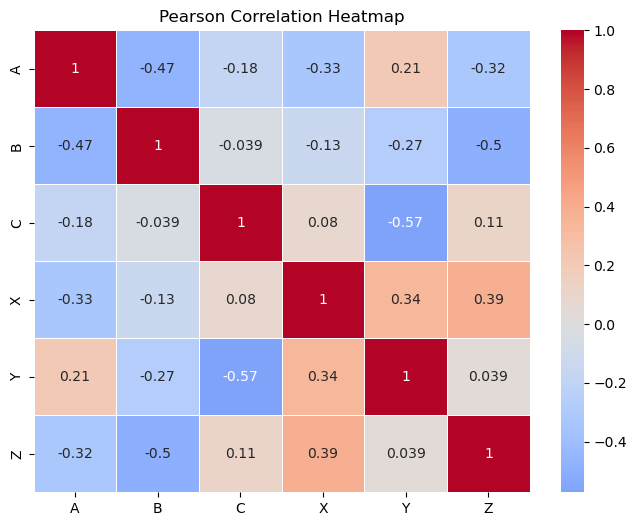

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating two random DataFrames
np.random.seed(42)  # For reproducibility
df1 = pd.DataFrame(np.random.rand(10, 3), columns=['A', 'B', 'C'])
df2 = pd.DataFrame(np.random.rand(10, 3), columns=['X', 'Y', 'Z'])

# Merging both DataFrames
df_combined = pd.concat([df1, df2], axis=1)

# Compute Pearson correlation matrix
correlation_matrix = df_combined.corr(method='pearson')

# Visualization using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Pearson Correlation Heatmap")
plt.show()



## **Test Result / Output**
- Display dataset before and after preprocessing.
- Show visualizations for missing values, outliers, and feature correlations.
- Compare data distributions before and after applying data cleaning techniques.

## **Analysis and Discussion**
- Discuss the insights gained from each visualization.
- Explain the impact of data preprocessing on dataset clarity.
- Highlight key takeaways and suggest best practices for real-world data analysis


### **Key Observations:**
- Data visualization helped identify missing values, outliers, and distribution patterns.
- Handling missing values improved dataset reliability.
- Outlier detection using box plots provided a clear view of extreme values.
- Correlation heatmaps helped in feature selection.

### **Conclusion:**
This lab experiment demonstrated the importance of data visualization in understanding and processing data. By systematically handling NULL values and using various visualization techniques, we gained deeper insights into the dataset, aiding better decision-making in machine learning.

